In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from collections import Counter

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


# 기본적 모듈을 임포트 해줍니다.

In [60]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 트레인, 테스트 데이터를 불러옵니다.

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("numeric_feats : ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("categorical_feats : ", len(categorical_feats))

# numeric(수지형) 변수와 categoric(명목형) 변수를 나눔

numeric_feats :  38
categorical_feats :  43


In [6]:
print(train[numerical_feats].columns)
print
print(train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

이상치 탐색 및 제거

In [7]:
def detect_outliers(df, n, features):
    outlier_indices=[]
    for col in features:
        Q1 = np.percentile(df[col], 25)    # 25퍼센트
        Q3 = np.percentile(df[col], 75)    # 75퍼센트
        IQR = Q3 - Q1                     # 결과의 차이값
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)   # append와 달리 리스트 안에 항목들을 다른 리스트에 추가
    outlier_indices = Counter(outlier_indices)     # Counter는 글자 수 세기
#     print(outlier_indices.items())
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers
    # ****** |같은 값이 2개 이하인 값들만 가져오고 나중에 없앨 것.   
Outliers_to_drop = detect_outliers(train, 2, ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
                                   'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                   'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                   'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                                   'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                                   'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                                   'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                                   'MiscVal', 'MoSold', 'YrSold'])

In [8]:
train.loc[Outliers_to_drop]
# Outliers_to_drop에 있는 값들을 포함한 train안에 값들을 가져옴

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
246,247,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,137000
291,292,190,RL,55.0,5687,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,135900
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
344,345,160,RM,36.0,2592,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,85000
504,505,160,RL,24.0,2308,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,147000


In [9]:
# train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

train.shape

(1460, 81)

- 결측치 확인

In [10]:
for col in train.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msperc)
# train[col].isnull().sum() --> 결측치 값이 몇개인지 알아보는 방법

column:         Id	 Percent of NaN value: 0.00%
column: MSSubClass	 Percent of NaN value: 0.00%
column:   MSZoning	 Percent of NaN value: 0.00%
column: LotFrontage	 Percent of NaN value: 17.74%
column:    LotArea	 Percent of NaN value: 0.00%
column:     Street	 Percent of NaN value: 0.00%
column:      Alley	 Percent of NaN value: 93.77%
column:   LotShape	 Percent of NaN value: 0.00%
column: LandContour	 Percent of NaN value: 0.00%
column:  Utilities	 Percent of NaN value: 0.00%
column:  LotConfig	 Percent of NaN value: 0.00%
column:  LandSlope	 Percent of NaN value: 0.00%
column: Neighborhood	 Percent of NaN value: 0.00%
column: Condition1	 Percent of NaN value: 0.00%
column: Condition2	 Percent of NaN value: 0.00%
column:   BldgType	 Percent of NaN value: 0.00%
column: HouseStyle	 Percent of NaN value: 0.00%
column: OverallQual	 Percent of NaN value: 0.00%
column: OverallCond	 Percent of NaN value: 0.00%
column:  YearBuilt	 Percent of NaN value: 0.00%
column: YearRemodAdd	 Percent of

In [11]:
for col in test.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (test[col].isnull().sum() / test[col].shape[0]))
    print(msperc)
# test도 같이 해줌
# train, test 둘다 PoolQC, Fence, MisFeature이 많음.

column:         Id	 Percent of NaN value: 0.00%
column: MSSubClass	 Percent of NaN value: 0.00%
column:   MSZoning	 Percent of NaN value: 0.27%
column: LotFrontage	 Percent of NaN value: 15.56%
column:    LotArea	 Percent of NaN value: 0.00%
column:     Street	 Percent of NaN value: 0.00%
column:      Alley	 Percent of NaN value: 92.67%
column:   LotShape	 Percent of NaN value: 0.00%
column: LandContour	 Percent of NaN value: 0.00%
column:  Utilities	 Percent of NaN value: 0.14%
column:  LotConfig	 Percent of NaN value: 0.00%
column:  LandSlope	 Percent of NaN value: 0.00%
column: Neighborhood	 Percent of NaN value: 0.00%
column: Condition1	 Percent of NaN value: 0.00%
column: Condition2	 Percent of NaN value: 0.00%
column:   BldgType	 Percent of NaN value: 0.00%
column: HouseStyle	 Percent of NaN value: 0.00%
column: OverallQual	 Percent of NaN value: 0.00%
column: OverallCond	 Percent of NaN value: 0.00%
column:  YearBuilt	 Percent of NaN value: 0.00%
column: YearRemodAdd	 Percent of

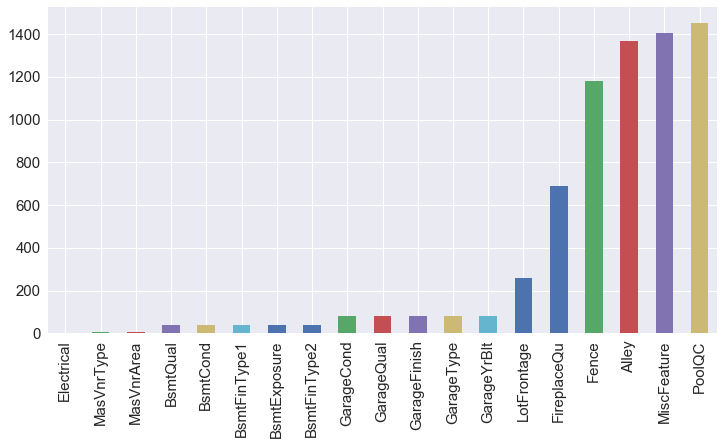

In [12]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12, 6))

# 결측치양 시각화

In [13]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[col].kurt())  
         )
    
# 수치형 변수의 Skewness(비대칭도), Kurtosis(첨도)를 확인
# 이는 분포가 얼마나 비대칭을 나타내는가 알려주는 척도. (비대칭도: a = 0이면 정규분포, a < 0 이면 오른쪽으로 치우침, a > 0 이면 왼쪽으로 치우침)
# 비대칭도와 첨도를 띄는 변수가 여럿 보입니다. Target Feature인 "SalePrice" 또한 약간의 정도를 보이는 것으로 보입니다.

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.16     Kurtosis: 017.45
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.67     Kurtosis: 010.08
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

## EDA

- Numerical Data 탐색

수치형 데이터들을 알아보기 ㅜ이해 다음 4가지 Plot을 그림
 - Correlation Heat Map
 - Zoomed Heat Map
 - Pair Plot
 - Scatter Plot

Correlation Heat Map

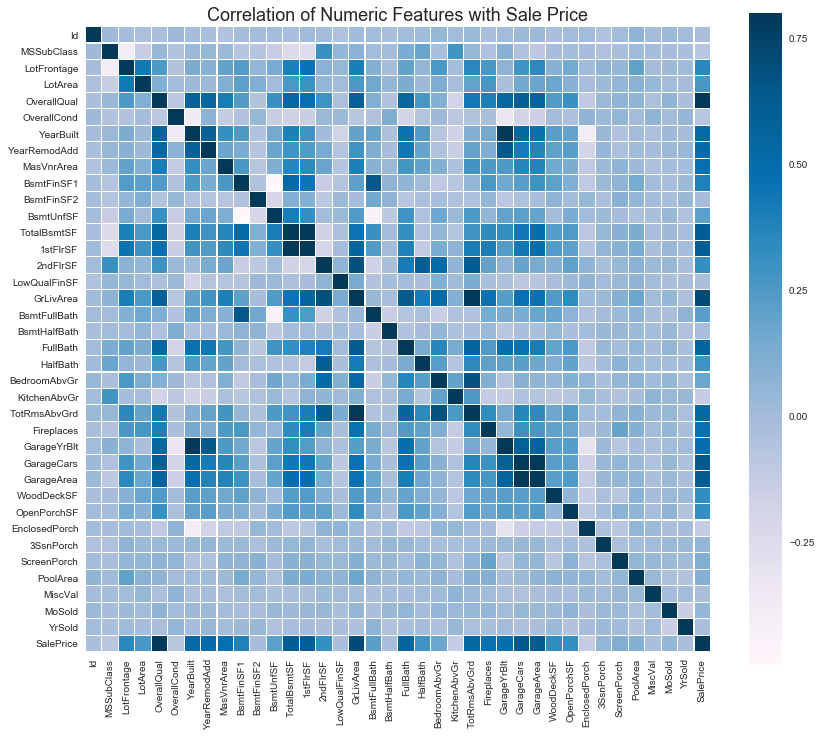

In [14]:
corr_data = train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                      'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
# 수치형 데이터들

colormap = plt.cm.PuBu
sns.set(font_scale = 1.0)

f, ax = plt.subplots(figsize = (14, 12))
plt.title('Correlation of Numeric Features with Sale Price', y=1, size=18)
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1,
           cmap = colormap, linecolor = "white", vmax = 0.8)

# heat map이란 분포를 색으로 나타낸것
# heat map은 seaborn덕분에 직관적으로 이해가 가능하여 변수 간 상관관계에 대해 쉽게 알 수 잇음
# 또한 변수간 다중 공산성을 감지하는 데 유용
# 가운데 대각선을 제외함.
# 첫번째로 강한 것은 'TotalBSMTSF'와 "1stFlrSF"변수의 관계
# 두번째는 'Garage'관련 세 변수.
# 두 경우 변수 사이의 상관 관계가 너무 강해 다중 공산성 상황이 발생할 수 있음
# 변수가 거의 동일한 정보를 제공하므로 다중 공산성이 실제로 발생한다는 결론을 내릴 수 있음
# 다른 확인해야할 부분은 'SalePrice'와의 상관관계. y이기 때문에
# 'GrlivArea', 'TotalBsmtSF', 'OverallQual'이 'SalePrice'와 큰 관계를 보임
# 나머지 변수와의 상관관계를 자세히 알아보기 위해 Zommed Heat Map을 확인.

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


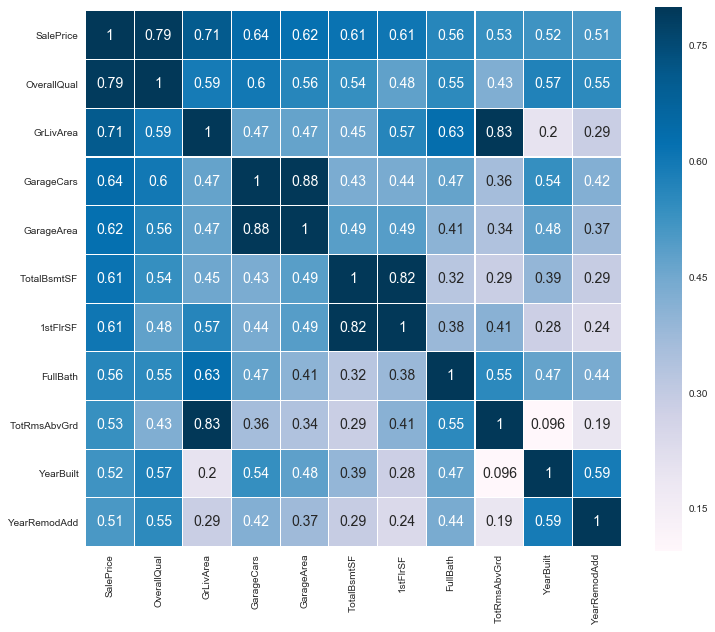

In [15]:
k = 11
cols = corr_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
# nlargest는 상위 몇개만 가져오겠다. 여기서는 k=11이기 때문에 상위 11개를 가져오겠다는 뜻
# corr해서 SalePrice와 가장 연관되어있는 상위 11개 가져오기
print(cols)
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(cm, vmax=.8, linewidths=0.1, square = True, annot = True, cmap=colormap,
           linecolor="white", xticklabels = cols.values, annot_kws = {'size':14}, yticklabels = cols.values)

# vmax : 지정 값 이상부터 가장 진한색 결국 최대치
# 가장 눈에 띄는 GarageCars와 GarageArea, TotalBsmtSF와 1stFlrSF. 이 2세트는 밀접하게 연결되어 있음
# Target feature(Sale Price)와 가장 밀접한 연관이 있는 feature는 'OverallQual', 'GrLivArea', 'TotalBsmtSF'
# GarageCars와 GarageArea, TotalBsmtSF와 1stFlrSF, TotRmsAbvGrd와 GrLivArea 이건 모두 매우 유사한 정보를 포함하고 있어 다중공산성이 나타남.
# SalePrice와 더 연관되어 있는 변수인 GarageCars와 TotalBsmtSF, GrLivArea를 남기고 나머지는 버림
# SalePrice와 연관을 더 알아보기 위해 PairPlot을 그려보자.

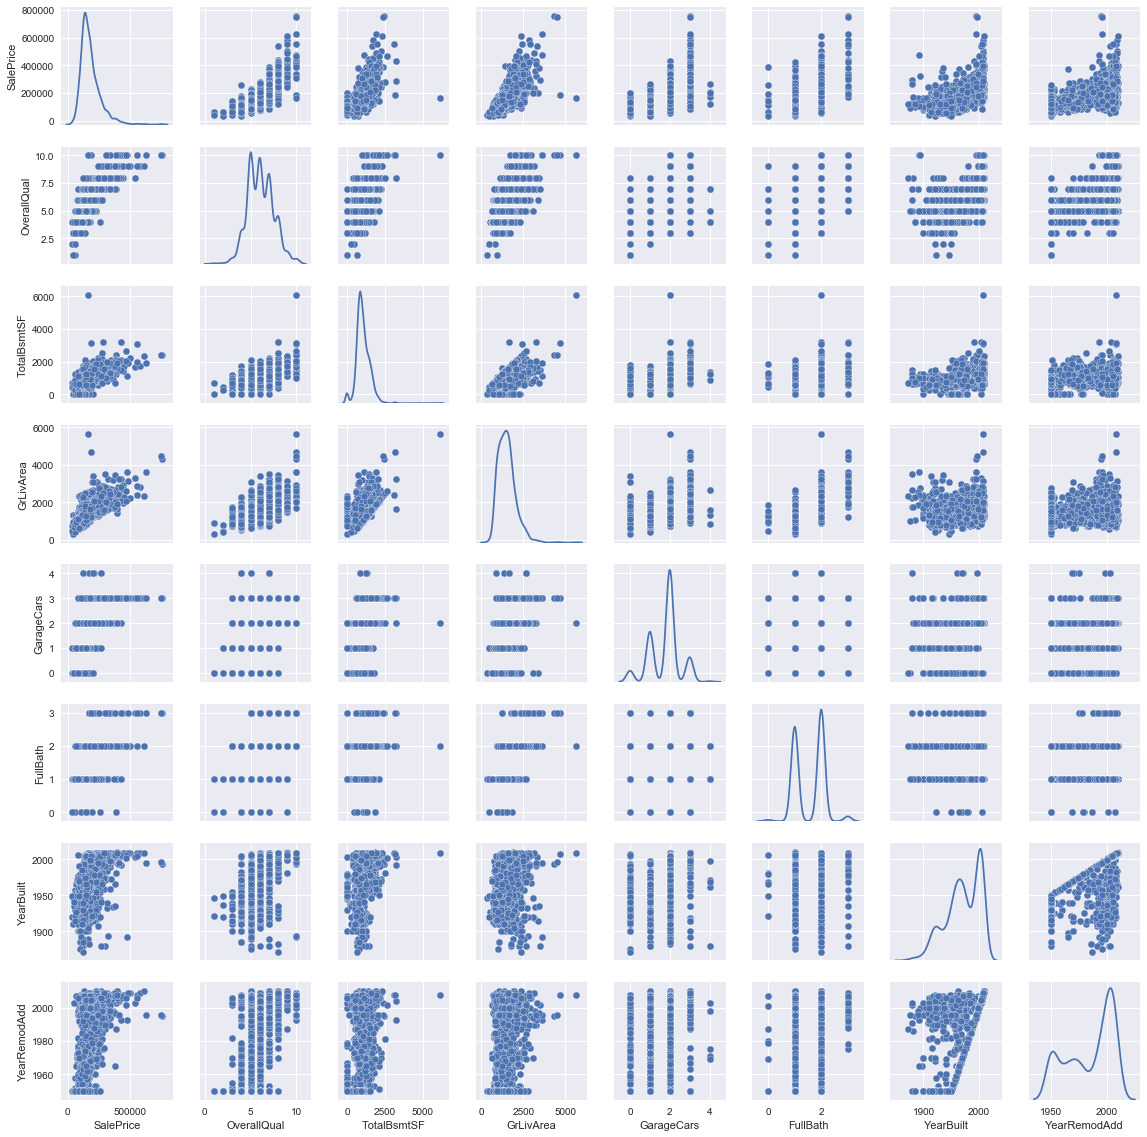

In [16]:
sns.set()
columns = ["SalePrice", "OverallQual", "TotalBsmtSF", "GrLivArea", "GarageCars", "FullBath", "YearBuilt", "YearRemodAdd"]
# 여기서 다중공산성이 있고 SalePrice와 연관이 없는 컬럼 제거
sns.pairplot(train[columns],size = 2, kind = 'scatter', diag_kind = 'kde')
plt.show()


# 위의 Zoom Heat Map에서 다중 공산성이 보이는 변수 중 SalePrice와 연관이 덜 한 변수를 제외하고 PairPlot을 그림
# TotalBsmtSF와 GrLiveArea는 데이터 설명에서 알 수 있듯이 지하실 면적과 생활공간 면적을 의미
# TotalBsmtSF와 GrLiveArea의 plot을 보면 점들이 직선처럼 그려지고 대부분 점은 해당 선 아래에 유지
# 이것은 일반적ㄱ으로 지하실 면적이 지상 생활 면적과 같은 수 있지만 더 크지 않기 때문에 보여지는 특성임.
# SalePrice와 YearBuilt의 plot을 보면 우상향 곡선임.
# 이는 전년도 대비 주택 가격 상승의 가속을 의미함.

scatter plot

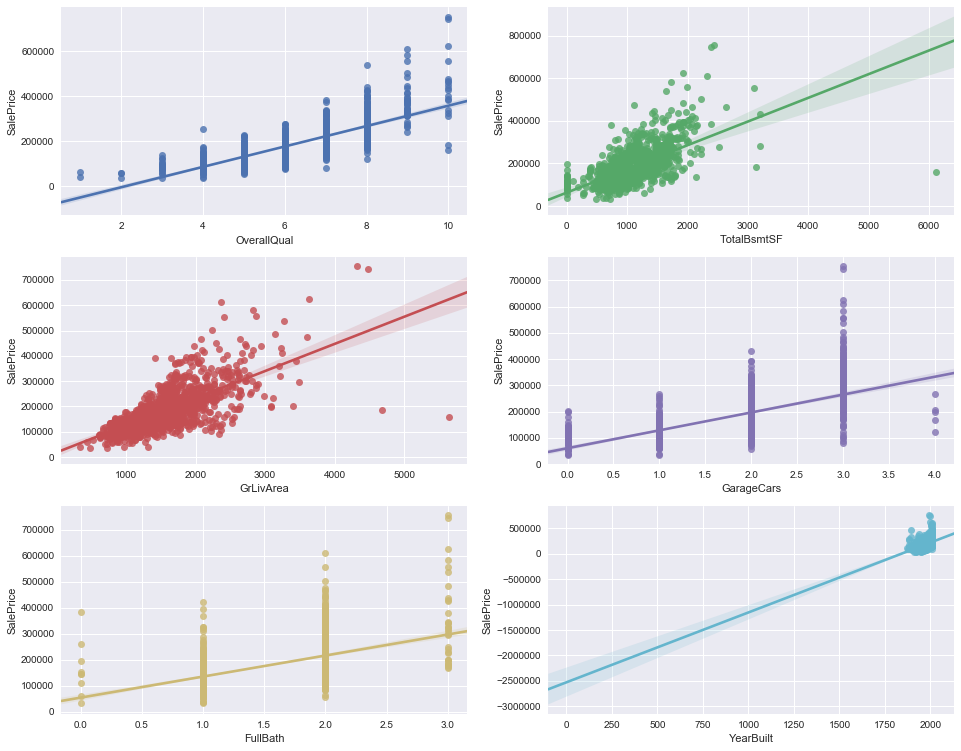

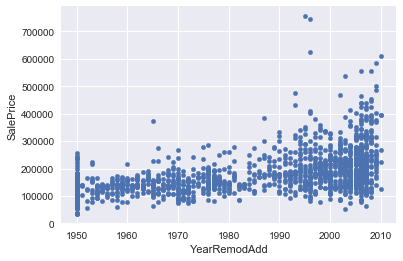

In [17]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16, 13))

OverallQual_scatter_plot = pd.concat([train['SalePrice'], train['OverallQual']], axis =1)
sns.regplot(x='OverallQual', y = 'SalePrice', data = OverallQual_scatter_plot, scatter = True, fit_reg=True, ax = ax1)

TotalBsmtSF_scatter_plot = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis =1)
sns.regplot(x='TotalBsmtSF', y = 'SalePrice', data = TotalBsmtSF_scatter_plot, scatter = True, fit_reg=True, ax = ax2)

GrLivArea_scatter_plot = pd.concat([train['SalePrice'], train['GrLivArea']], axis =1)
sns.regplot(x='GrLivArea', y = 'SalePrice', data = GrLivArea_scatter_plot, scatter = True, fit_reg=True, ax = ax3)

GarageCars_scatter_plot = pd.concat([train['SalePrice'], train['GarageCars']], axis =1)
sns.regplot(x='GarageCars', y = 'SalePrice', data = GarageCars_scatter_plot, scatter = True, fit_reg=True, ax = ax4)

FullBath_scatter_plot = pd.concat([train['SalePrice'], train['FullBath']], axis =1)
sns.regplot(x='FullBath', y = 'SalePrice', data = FullBath_scatter_plot, scatter = True, fit_reg=True, ax = ax5)

YearBuilt_scatter_plot = pd.concat([train['SalePrice'], train['YearBuilt']], axis =1)
sns.regplot(x='YearBuilt', y = 'SalePrice', data = YearBuilt_scatter_plot, scatter = True, fit_reg=True, ax = ax6)

YearRemodAdd_scatter_plot = pd.concat([train['SalePrice'], train['YearRemodAdd']], axis =1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd', 'SalePrice')

# SalePrice와 가장 밀접한 연관이 있다고 판단됐던 변수들의 Scatter Plot을 그림
# OverallQual, GarageCars, Fullbath와 같은 변수들은 실제로 범주형 데이터의 특징이 보인다고 할 수 있음(등급, 갯수 등을 의미하기 때문)

## Categorical Data 탐색

남은 범주형 변수들도 확인해야함.

질적 변수를 사용하여 두가지 방법을 구현할 수 있음

첫 번째는 변수 값과 관련하여 SalePrice의 분포를 확인

두 번째로 가능한 범주별로 더미 변수를 만듬

In [18]:
for catg in list(categorical_feats):
    print(train[catg].value_counts())
    print('#'*50)
    
# 범주형 변수들과 각 범주를 확인

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
Grvl    50
Pave    41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
############################################

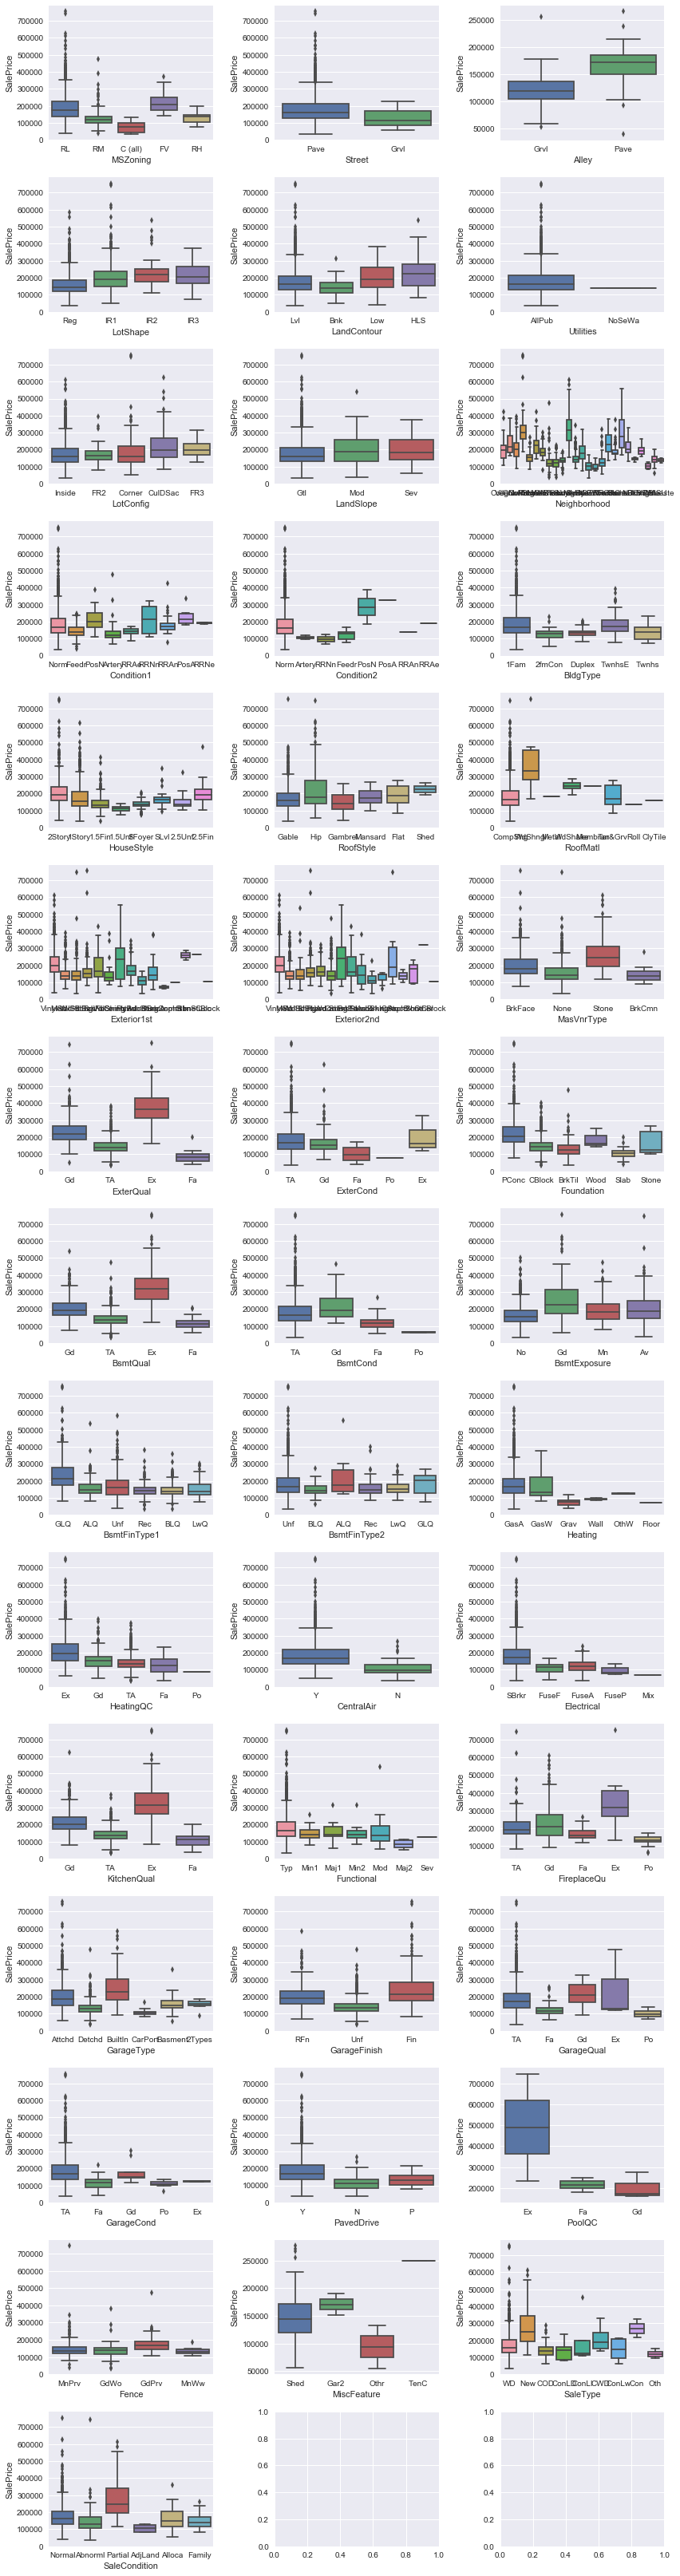

In [19]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4, nr_rows*3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r* nr_cols + c
        if i < len(li_cat_feats):
            sns.boxplot(x = li_cat_feats[i], y = train['SalePrice'], data = train, ax = axs[r][c])
#             
plt.tight_layout()
plt.show()

# BoxPlot을 그려 범주형 변수와 SalePrice의 관계를 확인
# 일부 범주는 다른 범주보다 SalePrice와 관련하여 더 다양하게 보임
# Neighborhood 변수와 SaleType 변수는 주택 가격 편차가 매우 크므로 영향이 크다고 생각
# 또한 수영장이 잇으면 가격이 크게 증가
# 정리하면 SalePrice에 영향을 가장 많이 끼치는 변수로는 'MSZoning', 'Neighborhood', 'Condition2',
# 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType' 등이 있음.

In [20]:
num_strong_corr = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars',
                   'FullBath','YearBuilt','YearRemodAdd']

num_weak_corr = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'BsmtFullBath',
                 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

catg_strong_corr = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                    'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

# SalePrice와 강하게 연관되어 있는거 아닌 것, 범주형 숫자형으로 Feature나눔

## Feature Engineering


- log 변환

Skewness : 1.882876
Kurtosis : 6.536282


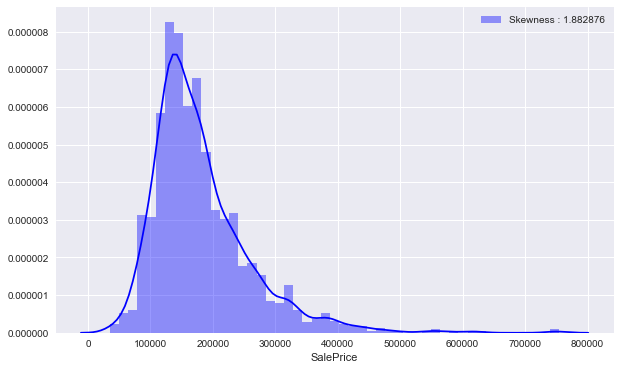

In [21]:
f, ax = plt.subplots(1, 1, figsize = (10, 6))
g = sns.distplot(train["SalePrice"], color = "b", label = "Skewness : {:2f}".format(train["SalePrice"].skew()), ax = ax)
g = g.legend(loc = "best")  # 최대값 표시

print("Skewness : %f" % train["SalePrice"].skew())
print("Kurtosis : %f" % train["SalePrice"].kurt())

# SalePrice의 비대칭도와 첨도 확인
# 그래프와 수치를 확인하면 정상적으로 분포되지 않는 것을 확인
# 예측의 정확도를 높이기 위해 로그 변환을 수행

Skewness : 1.882876
Kurtosis : 6.536282


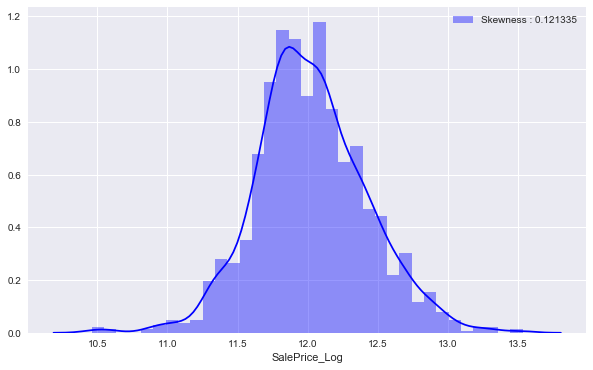

In [22]:
train["SalePrice_Log"] = train["SalePrice"].map(lambda i:np.log(i) if i>0 else 0)

f, ax = plt.subplots(1, 1, figsize = (10, 6))
g = sns.distplot(train["SalePrice_Log"], color = 'b', label = 'Skewness : {:2f}'.format(train["SalePrice_Log"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness : %f" % train["SalePrice"].skew())
print("Kurtosis : %f" % train["SalePrice"].kurt())

train.drop('SalePrice', axis=1, inplace = True)

# kewness, kurtosis를 없애주기 위해 로그를 취함.
# Log변환을 수행한 새로운 SalePrice_Log를 만들고 SalePrice는 버림
# 로그를 취해준 그래프와 수치가 바뀐 모습을 볼 수 있음.(정규 근사화)

Data Check 과정에서 봤을 때 Skewness와 Kurtosis가 보이는 변수들이 꽤 있음.

하지만 EDA과정에서 중요하다고 판단되었던 Numerical feature들은 Skewness와 Kurtosis가 수치적으로 보이지 않으므로 SalePrice만 Log 취해줌

실제로 해볼 때 하나씩 확인해보자

- 결측 데이터 처리

집값 예측 문제에는 굉장히 많은 NaN 데이터가 포함되어있음

하지만 여러 변수들의 특징을 살펴보면 Nan의 의미를 재파악 할 수 있음.

있다 ㅡ 없다의 개념일 뿐 측정되지 않을 데이터의 의미가 아님.

이러한 변수들의 특징을 잘 파악하여 결측데이터를 처리해주도록 함.

In [23]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in cols_fillna:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)
    
# 위에 설명한 바와 같이 '없다'의 의미를 갖는 변수들임.
# NaN을 없다는 의미의 None으로 대체

In [24]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

# 결측치 처리정도

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice_Log,0,0.000000
ExterCond,0,0.000000


In [25]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

# 나머지 결측치들은 평균값으로 대체

In [26]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

# 다시 결측치 확인 결과 없어짐

,Total,Percent
SalePrice_Log,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [27]:
id_test = test["Id"]

to_drop_num = num_weak_corr
to_drop_catg = catg_weak_corr

cols_to_drop = ["Id"] + to_drop_num + to_drop_catg

for df in [train, test]:
    df.drop(cols_to_drop, inplace=True, axis = 1)
    
# SalePrice와 상관관계가 약한 모든 변수 삭제

In [28]:
print(train.shape)
train.head()

(1460, 18)


,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,GarageCars,SaleType,SalePrice_Log
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,Gd,Gd,856,Y,SBrkr,1710,2,Gd,2,WD,12.247694
1,RL,Veenker,Norm,6,1976,1976,None,TA,Gd,1262,Y,SBrkr,1262,2,TA,2,WD,12.109011
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,Gd,Gd,920,Y,SBrkr,1786,2,Gd,2,WD,12.317167
3,RL,Crawfor,Norm,7,1915,1970,None,TA,TA,756,Y,SBrkr,1717,1,Gd,3,WD,11.849398
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,Gd,Gd,1145,Y,SBrkr,2198,2,Gd,3,WD,12.429216


- Categorical Data 수치형 변환

EDA과정의 Boxplot에서 보았던 SalePrice에 영향이 큰 변수들을 변환

먼저 ViolinPlot을 그려 범주들의 SalePrice의 관계를 살펴봄

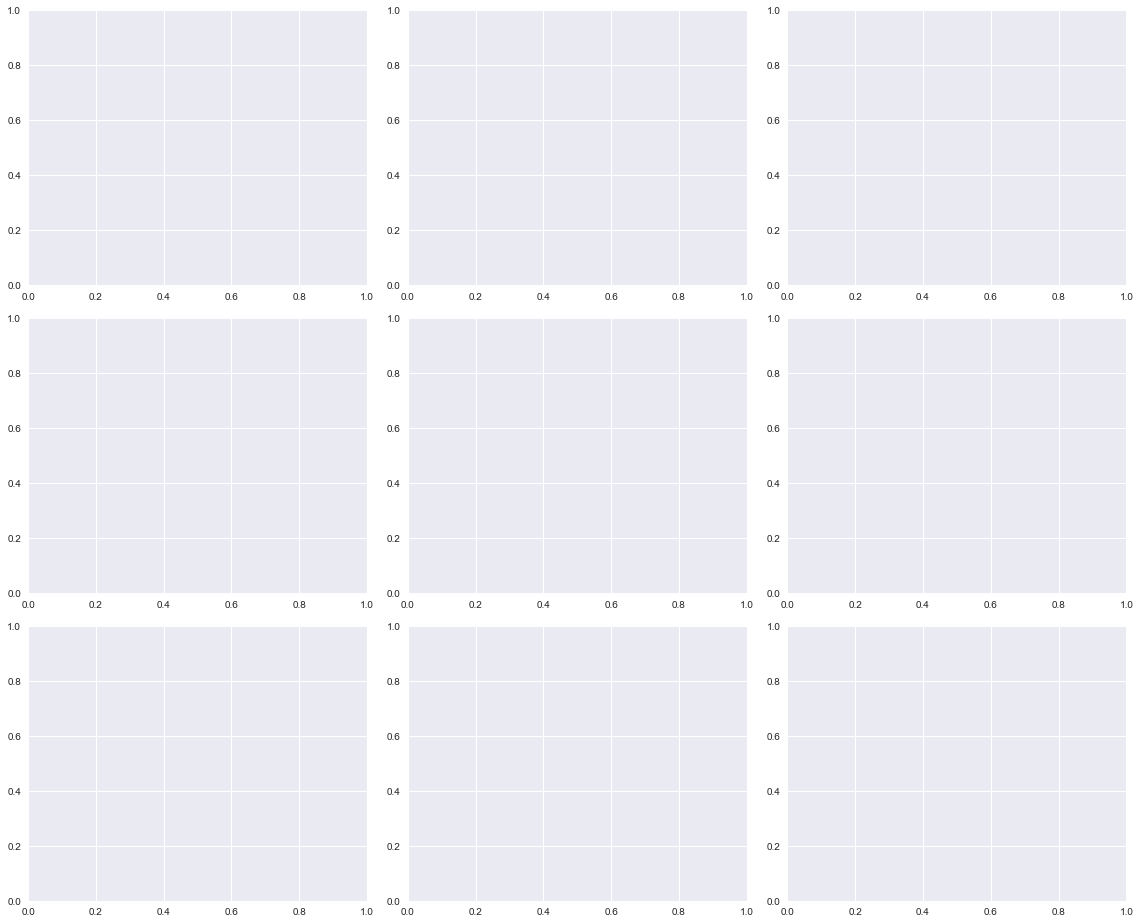

In [29]:
catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 13))

# catg_list

for r in range(0, 3):
    for c in range(0, 3):
        if i < len(catg_list):
            sns.violinplot(x = catg_list[i], y = train['SalePrice_Log'], data = train, ax = axs[r][c])
            
            
plt.tight_layout()
plt.show()
# for catg in catg_list:
#     sns.violinplot(x = catg, y = train["SalePrice_Log"], data=train)
#     plt.show()
    
# 각 범주들을 개별로 봄

In [61]:
from scipy


#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')6ㅔㅑ
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

NameError: name 'norm' is not defined

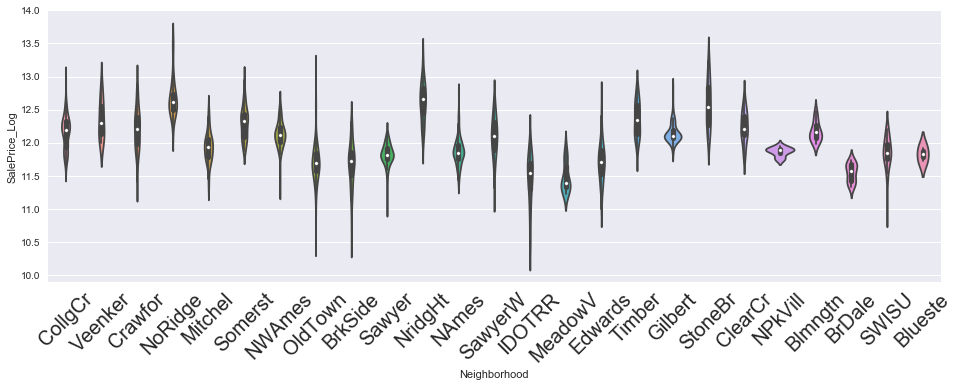

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=train["SalePrice_Log"], data=train, ax=ax)
plt.xticks(rotation = 45, fontsize = 20)
plt.show()

# 범주가 가장 많은 Neighborhood 변수도 확인

In [31]:
for catg in catg_list:
    g = train.groupby(catg)["SalePrice_Log"].mean()
    print(g)
    
# 각 범주들에 해당되는 SalePrice_Log 평균

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085885
RM         11.692893
Name: SalePrice_Log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025895
PosA      12.691580
PosN      12.493879
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_Log, dtype: float64
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.425138
Name: SalePrice_Log, dtype: float64
ExterQual
Ex    12.764044
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: SalePrice_Log, dtype: float64
BsmtQual
Ex      12.640394
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: SalePrice_Log, dtype: float64
CentralAir
N    11.491858
Y    12.061090
Name: SalePrice_Log, dtype: float64
Electrical
FuseA    11.660315
FuseF    11.539624
FuseP    11.446808
Mix      11.112448
None     12.028739
SBrkr    12.061464
Name: SalePrice_Log, dtype: float64
KitchenQual
Ex    12.633614
F

In [32]:
train["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [33]:
# MSZoning
msz_catg2 = ["RM", "RH"]
msz_catg3 = ["RL", "FV"]

# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN']

# SaleType
SlTy_catg1 = ["Oth"]
SlTy_catg3 = ["CWD"]
SlTy_catg4 = ["New", "Con"]

# 수치형 변환을 위해 Violinplot과 SalePrice_Log 평균을 참고하여 각 변수들의 범주들을 그룹화 함.

In [34]:
for df in [train, test]:
    
    df['MSZ_num'] = 1
    df.loc[(df['MSZoning'].isin(msz_catg2)), 'MSZ_num'] = 2
    df.loc[(df['MSZoning'].isin(msz_catg3)), 'MSZ_num'] = 3
    
    df['NbHd_num'] = 1
    df.loc[(df['Neighborhood'].isin(nbhd_catg2)), 'NbHd_num'] = 2
    df.loc[(df['Neighborhood'].isin(nbhd_catg3)), 'NbHd_num'] = 3
    
    df['Cond2_num'] = 1
    df.loc[(df['Condition2'].isin(cond2_catg2)), 'Cond2_num'] = 2
    df.loc[(df['Condition2'].isin(cond2_catg3)), 'Cond2_num'] = 3
    
    df['Mas_num'] = 1
    df.loc[(df['MasVnrType'] == 'Stone'), 'Mas_num'] = 2
    
    df['ExtQ_num'] = 1
    df.loc[(df['ExterQual'] == 'TA'), 'ExtQ_num'] = 2
    df.loc[(df['ExterQual'] == 'Gd'), 'ExtQ_num'] = 3
    df.loc[(df['ExterQual'] == 'Ex'), 'ExtQ_num'] = 4
    
    df['BsQ_num'] = 1
    df.loc[(df['BsmtQual'] == 'Gd'), 'BsQ_num'] = 2
    df.loc[(df['BsmtQual'] == 'Ex'), 'BsQ_num'] = 3
    
    df['CA_num'] = 1
    df.loc[(df['CentralAir'] == 'Y'), 'CA_num'] = 1
    
    df['Elc_num'] = 1
    df.loc[(df['Electrical'] == 'SBrkr'), 'Elc_num'] = 2
    
    df['KiQ_num'] = 1
    df.loc[(df['KitchenQual'] == 'TA'), 'KiQ_num'] = 2
    df.loc[(df['KitchenQual'] == 'Gd'), 'KiQ_num'] = 3
    df.loc[(df['KitchenQual'] == 'Ex'), 'KiQ_num'] = 4
    
    df['SlTy_num'] = 1
    df.loc[(df['SaleType'].isin(SlTy_catg1)), 'SlTy_num'] = 1
    df.loc[(df['SaleType'].isin(SlTy_catg3)), 'SlTy_num'] = 3
    df.loc[(df['SaleType'].isin(SlTy_catg4)), 'SlTy_num'] = 4
    
    
# 각 범주별로 수치형 변환.. 숫자가 무슨 의미인지 모르겠음.

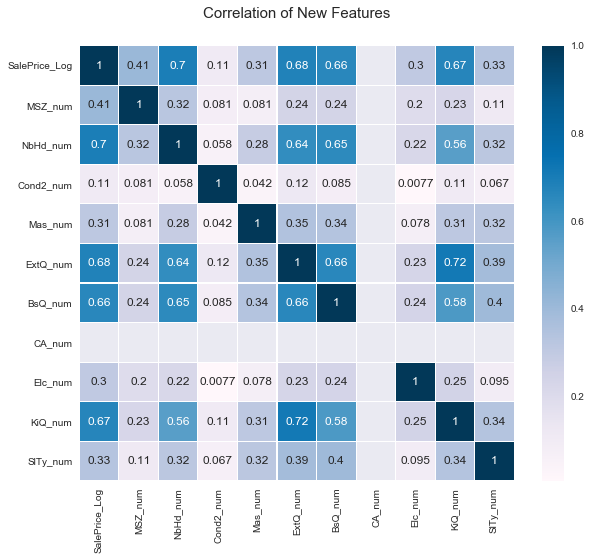

In [35]:
new_col_HM = train[['SalePrice_Log', 'MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of New Features", y = 1.05, size = 15)
sns.heatmap(new_col_HM.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor="white", annot=True, annot_kws = {"size" : 12})

# 변환하여 새로 만들어진 numerical feature들 또한 Heat Map을 그려봄
# NbHd_num, ExtQ_num, BsQ_num, KiQ_num을 제외하고는 SalePrice와 큰 상관관계가 있는 열은 거의 없음

In [36]:
train.drop(['MSZoning','Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType', 'Cond2_num', 'Mas_num', 'CA_num', 'Elc_num', 'SlTy_num'], axis = 1, inplace = True)
test.drop(['MSZoning', 'Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType', 'Cond2_num', 'Mas_num', 'CA_num', 'Elc_num', 'SlTy_num'], axis = 1, inplace = True)

# 기존 범주형 변수와 새로 만들어진 수치형 변수 역시 유의하지 않은 것들은 삭제합니다. 

In [37]:
print(train.shape)

train.head()

(1460, 13)


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,7,2003,2003,856,1710,2,2,12.247694,3,2,3,2,3
1,6,1976,1976,1262,1262,2,2,12.109011,3,2,2,2,2
2,7,2001,2002,920,1786,2,2,12.317167,3,2,3,2,3
3,7,1915,1970,756,1717,1,3,11.849398,3,2,2,1,3
4,8,2000,2000,1145,2198,2,3,12.429216,3,3,3,2,3


In [38]:
print(test.shape)

test.head()

(1459, 12)


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,5,1961,1961,882.0,896,1,1.0,2,1,2,1,2
1,6,1958,1958,1329.0,1329,1,1.0,3,1,2,1,3
2,5,1997,1998,928.0,1629,2,2.0,3,2,2,2,2
3,6,1998,1998,926.0,1604,2,2.0,3,2,2,1,3
4,8,1992,1992,1280.0,1280,2,2.0,3,3,3,2,3


## Modeling & make submission

model : XGBoost

XGBoost를 사용함

튜토리얼이 목적인 커널이므로 간단하게 모델링하여 결과확인

다른 모델을 사용하고 싶거나 성능을 높여 결과값을 더 좋게 받고 싶으면 상위 커널 참고

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train = train.drop("SalePrice_Log", axis=1).values
target_label = train["SalePrice_Log"].values
X_test = test.values
X_train_kf, X_test_kf, y_train_kf, y_test_kf = train_test_split(X_train, target_label, test_size = 0.2, random_state = 2000)

# test하기 전 validation 과정
# train데이터의 20%를 vaaidation으로 주고 80%를 train으로 남겨줌

In [40]:
import xgboost

regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8, max_depth = 3, subsample = 0.52, n_estimators = 100, random_state = 7, ntrhead = -1)
regressor.fit(X_tr, y_tr)
                                 
    
# XGboost모델 만듬

NameError: name 'X_tr' is not defined

## Hyperparameter Tuning 연습

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model

In [ ]:


# train 데이터를 hold-out validation용으로 나눕니다.
# X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
#     train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

# 트리의 갯수를 지정합니다.
n_estimators = 100

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_loop = 100

# early stopping을 할 횟수입니다.
early_stopping_rounds = 20

# coarse_hyperparameters_list 탐색 결과를 리스트로 저장합니다.
coarse_hyperparameters_list = []

# num_loop 횟수만큼 랜덤 서치를 반복합니다.
for loop in range(num_loop):
    # 이론 상으로 존재하는 모든 하이퍼패러미터 범위를 찾습니다.
    learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
    num_leaves = np.random.randint(2, 500)
    max_bin = np.random.randint(2, 500)
    min_child_samples = np.random.randint(2, 500) 
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    # 이를 LGBMClassifier으로 만듭니다.
    model = xgboost.XGBRFRegressor(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    
    # 모델을 학습합니다. 여기에서 early-stopping을 사용합니다.
    model.fit(X_train_kf, y_train_kf,
              eval_set = [(X_test_kf, y_test_kf)],
              verbose = 0)

    # 가장 좋은 점수와 이에 해당하는 n_estimators를 저장합니다.
    best_iteration = model.get_booster().best_iteration
#     score = model.best_score_['valid_0']['multi_logloss']
    
    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    coarse_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37
    })

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{loop:2} best iteration = {best_iteration}")
    
# coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
coarse_hyperparameters_list = pd.DataFrame(coarse_hyperparameters_list)

# 변환한 coarse_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (Log Loss는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
# coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = best_iteration)

# coarse_hyperparameters_list의 상위 5개를 출력합니다.
coarse_hyperparameters_list.head()

In [ ]:

regressor = xgboost.XGBRegressor(colsample_bytree = 0.658589, learning_rate = 0.000090, min_child_weight = 1.8, max_depth = 3, subsample = 0.52, n_estimators = 100, random_state = 7, ntrhead = -1)
regressor.fit(X_tr, y_tr)
                            

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV


while True:
    try:
        model = xgboost.XGBRFRegressor()

        # 트리의 갯수를 지정합니다.
        n_estimators = [100]

        # 랜덤 서치를 반복할 횟수입니다.
        # 보통 100번을 반복합니다.
        num_loop = 100

        # early stopping을 할 횟수입니다.
        early_stopping_rounds = 20

        # coarse_hyperparameters_list 탐색 결과를 리스트로 저장합니다.
        coarse_hyperparameters_list = []

        # num_loop 횟수만큼 랜덤 서치를 반복합니다.
        # for loop in range(num_loop):
            # 이론 상으로 존재하는 모든 하이퍼패러미터 범위를 찾습니다.
        learning_rate = list()
        num_leaves = list()
        max_bin = list()
        min_child_samples = list()
        subsample = list()
        colsample_bytree = list()
        for i in range(5):
            learning_rate.append(10 ** np.random.uniform(low = -10, high = 1))
            num_leaves.append(np.random.randint(2, 500))
            max_bin.append(np.random.randint(2, 500))
            min_child_samples.append(np.random.randint(2, 500)) 
            subsample.append(np.random.uniform(low = 0.1, high = 1.0))
            colsample_bytree.append(np.random.uniform(low = 0.1, high = 1.0))

        # 이를 LGBMClassifier으로 만듭니다.
        param_grid = {'n_estimators' : n_estimators,
                               'learning_rate' : learning_rate,
                               'num_leaves' : num_leaves,
                               'max_bin' : max_bin,
                               'min_child_samples' : min_child_samples,
                               'subsample' : subsample,
                               'subsample_freq' : [1],
                               'colsample_bytree' : [colsample_bytree],
                               'class_type' : ['balanced'],
                               'random_state' : [37]}

        cv = KFold(n_splits = 6, random_state = 1)

        gcv = GridSearchCV(model, param_grid = param_grid, cv=cv, scoring='f1', n_jobs=4)

        y_train_bin = (y_train_kf == 1).astype(int)

        gcv.fit(X_train_kf, y_train_bin)

        # gcv.fit(train_X.values,train_Y.values)
        print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
        print('best score', gcv.best_score_)      # 최고의 점수

    except RemoteTraceback:
        print("Error")

In [42]:
X_train_kf

array([[   7, 2003, 2003, ...,    3,    2,    3],
       [   9, 2005, 2006, ...,    3,    3,    3],
       [   6, 1964, 1991, ...,    2,    2,    3],
       ...,
       [   5, 1977, 1977, ...,    2,    2,    2],
       [   6, 1925, 1950, ...,    2,    1,    1],
       [   5, 1950, 2002, ...,    2,    1,    3]], dtype=int64)

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [44]:
random_cv.fit(X_train_kf,y_train_kf)
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   21.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   46.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.7min finished


[19:19:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4603, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=2,
       min_child_weight=4, missing=nan, monotone_constraints='()',
       n_estimators=900, n_jobs=0, ntrhead=-1, num_parallel_tree=1,
       objective='reg:squarederror', random_state=7, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.52,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
import xgboost

regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4603, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=2,
       min_child_weight=4, monotone_constraints='()',
       n_estimators=900, n_jobs=0, ntrhead=-1, num_parallel_tree=1,
       objective='reg:squarederror', random_state=7, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.52,
       tree_method='exact', validate_parameters=1, verbosity=None)
regressor.fit(X_train_kf, y_train_kf)

[19:20:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4603, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=2,
       min_child_weight=4, missing=nan, monotone_constraints='()',
       n_estimators=900, n_jobs=0, ntrhead=-1, num_parallel_tree=1,
       objective='reg:squarederror', random_state=7, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.52,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
# 머신러닝 모델을 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
# 추가로 %time 옵션을 왼쪽에 넣으면 실행 시간을 측정할 수 있습니다.
%time regressor.fit(X_train_kf, y_train_kf)

[19:20:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 670 ms


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4603, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=2,
       min_child_weight=4, missing=nan, monotone_constraints='()',
       n_estimators=900, n_jobs=0, ntrhead=-1, num_parallel_tree=1,
       objective='reg:squarederror', random_state=7, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.52,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [215]:
# fit이 끝났으면, predict_proba를 통해 각 범죄가 발생할 확률(probability)를 구합니다.
# predict가 아닌 predict_proba를 사용하는 이유는, 아래서 사용할 log loss 공식에서 확률을 이용하기 때문입니다.
# 이 결과를 y_predict_test_kf라는 이름의 변수에 할당합니다.
y_predict_test_kf = 

# y_predict_test_kf 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(y_predict_test_kf.shape)

# y_predict_test_kf를 화면에 출력합니다.
y_predict_test_kf

AttributeError: 'XGBRFRegressor' object has no attribute 'predict_proba'

In [212]:
# scikit-learn의 측정 공식(metrics) 모듈에서 log_loss 함수를 가져옵니다.
from sklearn.metrics import mean_squared_error

# log loss를 계산합니다. 정답(y, y_test_kf)과 예측값의 확률(p, y_predict_test_kf)을 데이터로 집어넣으면
# log lsos의 계산 결과가 나옵니다. 이를 score라는 변수에 할당합니다.
score = mean_squared_error(y_test_kf, y_predict_test_kf)**0.5

# score 변수에 할당한 점수를 출력합니다.
print(f"Score = {score:.5f}")

NameError: name 'y_predict_test_kf' is not defined

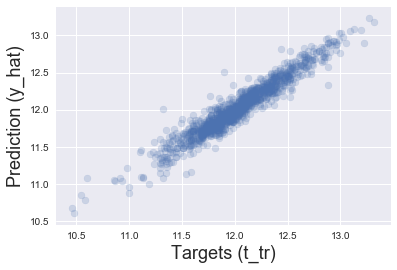

In [51]:
y_hat = random_cv.predict(X_train_kf)

plt.scatter(y_train_kf, y_hat, alpha = 0.2)
plt.xlabel('Targets (t_tr)', size=18)
plt.ylabel('Prediction (y_hat)', size=18)
plt.show()

In [54]:
random_cv.score(X_train_kf,y_train_kf)

-0.08205785297633923

In [55]:
# y_hat_test = random_cv.predict(X_)


# plt.scatter(y_vld, y_hat_test, alpha=0.2)
# plt.xlabel('Targets (y_vld)',size=18)
# plt.ylabel('Predictions (y_hat_test)',size=18)
# plt.show()

# validation으로 예측해봅니다.

In [56]:
random_cv.score(X_train_kf,y_train_kf)

-0.08205785297633923

In [57]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = random_cv, X = X_train_kf, y = y_train_kf, cv = 10)

# k-fold validation을 수행합니다.

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   21.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   45.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


[19:22:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   20.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   44.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


[19:24:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   21.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   45.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


[19:25:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   21.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   45.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


[19:27:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   21.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   45.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


[19:29:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   19.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   43.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


[19:30:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   20.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   44.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


[19:32:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   20.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   44.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.5min finished


[19:33:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   21.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   44.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


[19:35:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   44.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


[19:37:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { ntrhead } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [58]:
use_logvals = 1

pred_xgb = random_cv.predict(X_test)

sub_xgb = pd.DataFrame()
sub_xgb['Id'] = id_test
sub_xgb['SalePrice'] = pred_xgb

if use_logvals == 1:
    sub_xgb['SalePrice'] = np.exp(sub_xgb['SalePrice']) 

sub_xgb.to_csv('xgb.csv',index=False)

# use_logvals는 Log를 취해준 Target feature을 exp해주기 위해 사용되는 스위치 역할입니다.
# 제대로 된 예측을 위해 학습 후 Log변환을 풀어줘야하기 때문입니다.
# 이 셀의 코드를 통해 submission까지 완료하게됩니다.